In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

In [32]:
train_filename="train.csv"
test_filename="test.csv"
gender_submission_filename="gender_submission.csv"

train_data=pd.read_csv(train_filename)
test_data=pd.read_csv(test_filename)
gender_submission_data=pd.read_csv(gender_submission_filename)
Y_test=pd.read_csv('gender_submission.csv')['Survived'].values
train_data.shape,test_data.shape

((891, 12), (418, 11))

In [33]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dimic, Mr. Jovan",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [35]:
used_columns = ['Pclass', 'Sex', 'SibSp', 'Age', 'Parch', 'Fare', 'Embarked']
raw_full = pd.concat([train_data[used_columns], test_data[used_columns]])
raw_full.describe(include = 'all')

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked
count,1309.000000,1309,1309.000000,1046.000000,1309.000000,1308.000000,1307
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,843,NaN,NaN,NaN,NaN,914
mean,2.294882,NaN,0.498854,29.881138,0.385027,33.295479,NaN
std,0.837836,NaN,1.041658,14.413493,0.865560,51.758668,NaN
min,1.000000,NaN,0.000000,0.170000,0.000000,0.000000,NaN
25%,2.000000,NaN,0.000000,21.000000,0.000000,7.895800,NaN
50%,3.000000,NaN,0.000000,28.000000,0.000000,14.454200,NaN
75%,3.000000,NaN,1.000000,39.000000,0.000000,31.275000,NaN


In [36]:
raw_full.isnull().sum()

Pclass        0
Sex           0
SibSp         0
Age         263
Parch         0
Fare          1
Embarked      2
dtype: int64

In [37]:
raw_full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [38]:
raw_full['Embarked'].fillna('S', inplace=True)
raw_full['Fare'].fillna(raw_full['Fare'].median(), inplace=True)
raw_full['Age'].fillna(30, inplace=True)

In [39]:
raw_full["Sex"] = raw_full["Sex"].map({"male": 1, "female": 0}).astype(int)   
raw_full["Embarked"] = raw_full["Embarked"].map({"S": 1, "C": 2, "Q": 3}).astype(int)
raw_full['Fare']=raw_full['Fare'].apply(lambda x: (x - raw_full['Fare'].min())*10 / (raw_full['Fare'].max() - raw_full['Fare'].min()))

In [40]:
raw_full.describe(include = 'all')

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.644003,0.498854,29.905019,0.385027,0.649604,1.394194
std,0.837836,0.478997,1.041658,12.883281,0.865560,1.009927,0.653499
min,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.154116,1.000000
50%,3.000000,1.000000,0.000000,30.000000,0.000000,0.282127,1.000000
75%,3.000000,1.000000,1.000000,35.000000,0.000000,0.610447,2.000000
max,3.000000,1.000000,8.000000,80.000000,9.000000,10.000000,3.000000


In [41]:
y_train = train_data['Survived'].values
y_train.shape

(891,)

In [42]:
X_train = raw_full[:y_train.shape[0]]
X_test = raw_full[y_train.shape[0]:]
X_train.shape, y_train.shape, X_test.shape,Y_test.shape

((891, 7), (891,), (418, 7), (418,))

In [63]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [115]:
model = keras.Sequential([
    
    keras.layers.Dense(units=40,input_dim = 7,kernel_initializer='uniform',activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_his = model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
23/23 - 0s - loss: 0.6750 - accuracy: 0.5829 - val_loss: 0.6369 - val_accuracy: 0.6425
Epoch 2/100
23/23 - 0s - loss: 0.6533 - accuracy: 0.6124 - val_loss: 0.6199 - val_accuracy: 0.6425
Epoch 3/100
23/23 - 0s - loss: 0.6385 - accuracy: 0.6152 - val_loss: 0.6111 - val_accuracy: 0.6927
Epoch 4/100
23/23 - 0s - loss: 0.6233 - accuracy: 0.6447 - val_loss: 0.5693 - val_accuracy: 0.6927
Epoch 5/100
23/23 - 0s - loss: 0.5989 - accuracy: 0.6728 - val_loss: 0.5475 - val_accuracy: 0.7654
Epoch 6/100
23/23 - 0s - loss: 0.5758 - accuracy: 0.7051 - val_loss: 0.5115 - val_accuracy: 0.7318
Epoch 7/100
23/23 - 0s - loss: 0.5657 - accuracy: 0.7135 - val_loss: 0.4861 - val_accuracy: 0.7542
Epoch 8/100
23/23 - 0s - loss: 0.5307 - accuracy: 0.7458 - val_loss: 0.4571 - val_accuracy: 0.8101
Epoch 9/100
23/23 - 0s - loss: 0.5150 - accuracy: 0.7514 - val_loss: 0.4370 - val_accuracy: 0.7989
Epoch 10/100
23/23 - 0s - loss: 0.5049 - accuracy: 0.7683 - val_loss: 0.4445 - val_accuracy: 0.7598
Epoch 11/

In [116]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 40)                320       
_________________________________________________________________
dense_73 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 31        
Total params: 1,581
Trainable params: 1,581
Non-trainable params: 0
_________________________________________________________________


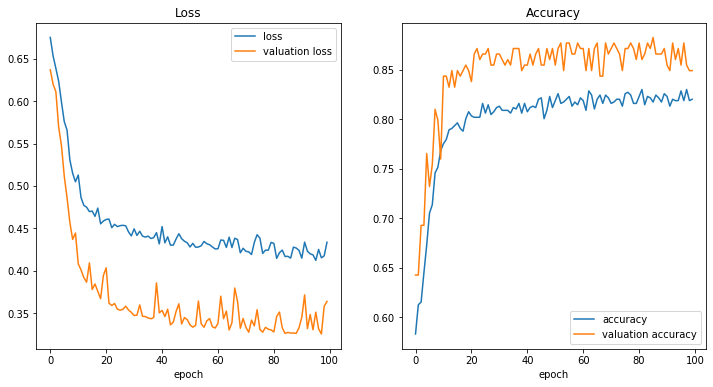

In [117]:
history=train_his.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["accuracy"],label="accuracy")
plt.plot(history["val_accuracy"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [128]:
model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.9139


[0.34347161650657654, 0.9138755798339844]